In [1]:
import numpy as np
import pandas as pd
from scipy.special import softmax
from scipy.stats import pointbiserialr
from ast import literal_eval
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import savefig
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

import seaborn as sns
sns.set_style("ticks")
sns.set_context(context='paper',font_scale=1.2)
sns.despine()

import yaml
import os
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

<Figure size 432x288 with 0 Axes>

In [2]:
model_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/artifacts/models/clmbr'
results_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/artifacts/results'
figure_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/notebooks/figures'

In [13]:
tv_tr_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_2000_lr_3e-5_temp_0.01_pool_trivial/train_loss.csv')
rd_tr_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_5e-5_temp_0.01_pool_rand_day/train_loss.csv')
mr_tr_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_1000_lr_5e-5_temp_0.01_pool_mean_rep/train_loss.csv')
dp_tr_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_5e-5_temp_0.01_pool_diff_pat/train_loss.csv')
clr_tr_df = pd.read_csv(f'{model_path}/cl_ete/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.01_l2_0.1_bs_1000_lr_1e-5_temp_0.01_pool_mean_rep/train_loss.csv')
ocp_tr_df = pd.read_csv(f'{model_path}/ocp/models/gru_sz_800_do_0.1_l2_0.1_lr_1e-5_pool_ocp/train_loss.csv')

In [14]:
tv_vl_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_2000_lr_3e-5_temp_0.01_pool_trivial/val_loss.csv')
rd_vl_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_5e-5_temp_0.01_pool_rand_day/val_loss.csv')
mr_vl_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_1000_lr_5e-5_temp_0.01_pool_mean_rep/val_loss.csv')
dp_vl_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_5e-5_temp_0.01_pool_diff_pat/val_loss.csv')
clr_vl_df = pd.read_csv(f'{model_path}/cl_ete/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.01_l2_0.1_bs_1000_lr_1e-5_temp_0.01_pool_mean_rep/val_loss.csv')
ocp_vl_df = pd.read_csv(f'{model_path}/ocp/models/gru_sz_800_do_0.1_l2_0.1_lr_1e-5_pool_ocp/val_loss.csv')

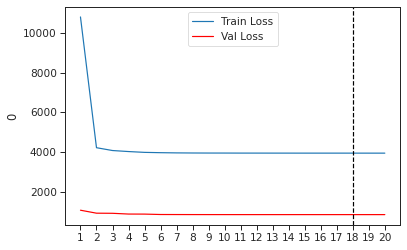

In [28]:
sns.lineplot(list(np.arange(1,21)),tv_tr_df['0'], label='Train Loss')
sns.lineplot(list(np.arange(1,21)),tv_vl_df['0'], color='red', label='Val Loss')
plt.xticks(list(np.arange(1, 21)))
plt.axvline(x=18, ls='--', color='black')
plt.savefig('figures/trivial_loss.png',bbox_inches='tight')

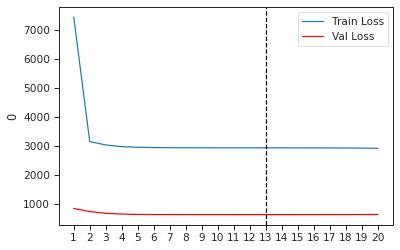

In [27]:
sns.lineplot(list(np.arange(1,21)),rd_tr_df['0'], label='Train Loss')
sns.lineplot(list(np.arange(1,21)),rd_vl_df['0'], color='red', label='Val Loss')
plt.xticks(list(np.arange(1, 21)))
plt.axvline(x=13, ls='--', color='black')
plt.savefig('figures/rand_day_loss.png',bbox_inches='tight')

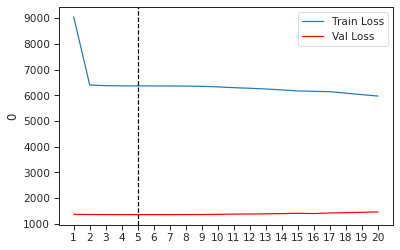

In [26]:
sns.lineplot(list(np.arange(1,21)),mr_tr_df['0'], label='Train Loss')
sns.lineplot(list(np.arange(1,21)),mr_vl_df['0'], color='red', label='Val Loss')
plt.xticks(list(np.arange(1, 21)))
plt.axvline(x=5, ls='--', color='black')
plt.savefig('figures/mean_rep_loss.png',bbox_inches='tight')

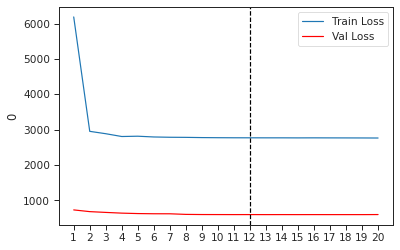

In [21]:
sns.lineplot(list(np.arange(1,21)),dp_tr_df['0'], label='Train Loss')
sns.lineplot(list(np.arange(1,21)),dp_vl_df['0'], color='red', label='Val Loss')
plt.xticks(list(np.arange(1, 21)))
plt.axvline(x=12, ls='--', color='black')
plt.savefig('figures/diff_pat_loss.png',bbox_inches='tight')

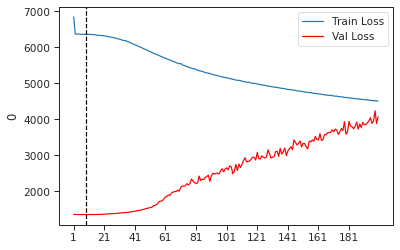

In [25]:
sns.lineplot(list(np.arange(1,201)),clr_tr_df['0'], label='Train Loss')
sns.lineplot(list(np.arange(1,201)),clr_vl_df['0'], color='red', label='Val Loss')
plt.axvline(x=9, ls='--', color='black')
plt.xticks(list(np.arange(1, 201, 20)))
plt.savefig('figures/cl_rep_loss.png',bbox_inches='tight')

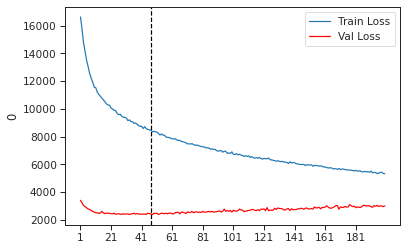

In [29]:
sns.lineplot(list(np.arange(1,201)),ocp_tr_df['0'], label='Train Loss')
sns.lineplot(list(np.arange(1,201)),ocp_vl_df['0'], color='red', label='Val Loss')
plt.axvline(x=47, ls='--', color='black')
plt.xticks(list(np.arange(1, 201, 20)))
plt.savefig('figures/ocp_loss.png',bbox_inches='tight')

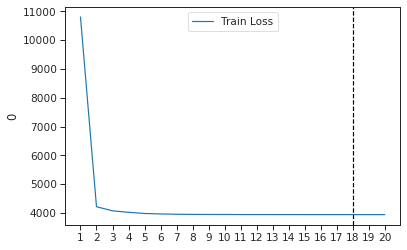

In [40]:
sns.lineplot(list(np.arange(1,21)),tv_tr_df['0'], label='Train Loss')

plt.xticks(list(np.arange(1, 21)))
plt.axvline(x=18, ls='--', color='black')
plt.savefig('figures/trivial_train_loss.png',bbox_inches='tight')

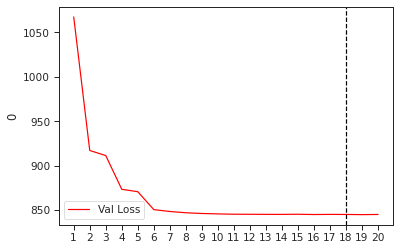

In [41]:
sns.lineplot(list(np.arange(1,21)),tv_vl_df['0'], color='red', label='Val Loss')

plt.xticks(list(np.arange(1, 21)))
plt.axvline(x=18, ls='--', color='black')
plt.savefig('figures/trivial_val_loss.png',bbox_inches='tight')

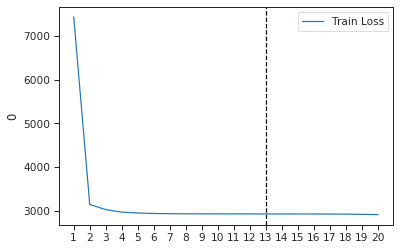

In [42]:
sns.lineplot(list(np.arange(1,21)),rd_tr_df['0'], label='Train Loss')

plt.xticks(list(np.arange(1, 21)))
plt.axvline(x=13, ls='--', color='black')
plt.savefig('figures/rand_day_train_loss.png',bbox_inches='tight')

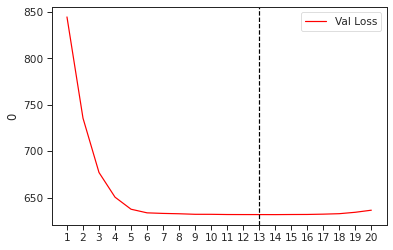

In [43]:
sns.lineplot(list(np.arange(1,21)),rd_vl_df['0'], color='red', label='Val Loss')

plt.xticks(list(np.arange(1, 21)))
plt.axvline(x=13, ls='--', color='black')
plt.savefig('figures/rand_day_val_loss.png',bbox_inches='tight')

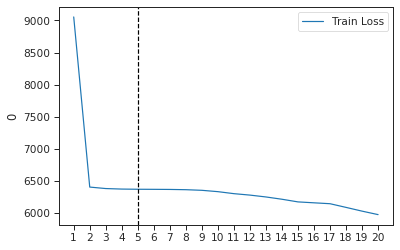

In [44]:
sns.lineplot(list(np.arange(1,21)),mr_tr_df['0'], label='Train Loss')

plt.xticks(list(np.arange(1, 21)))
plt.axvline(x=5, ls='--', color='black')
plt.savefig('figures/mean_rep_train_loss.png',bbox_inches='tight')

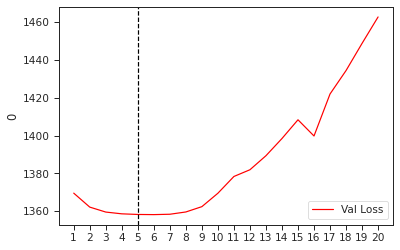

In [45]:
sns.lineplot(list(np.arange(1,21)),mr_vl_df['0'], color='red', label='Val Loss')

plt.xticks(list(np.arange(1, 21)))
plt.axvline(x=5, ls='--', color='black')
plt.savefig('figures/mean_rep_val_loss.png',bbox_inches='tight')

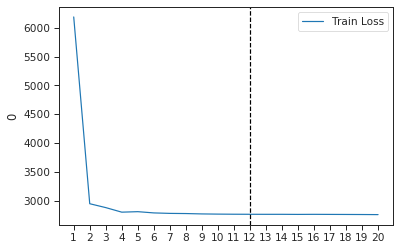

In [46]:
sns.lineplot(list(np.arange(1,21)),dp_tr_df['0'], label='Train Loss')

plt.xticks(list(np.arange(1, 21)))
plt.axvline(x=12, ls='--', color='black')
plt.savefig('figures/diff_pat_train_loss.png',bbox_inches='tight')

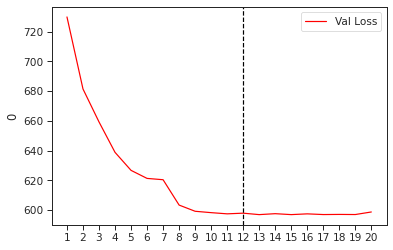

In [47]:
sns.lineplot(list(np.arange(1,21)),dp_vl_df['0'], color='red', label='Val Loss')

plt.xticks(list(np.arange(1, 21)))
plt.axvline(x=12, ls='--', color='black')
plt.savefig('figures/diff_pat_val_loss.png',bbox_inches='tight')

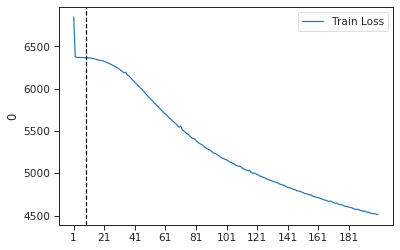

In [51]:
sns.lineplot(list(np.arange(1,201)),clr_tr_df['0'], label='Train Loss')

plt.xticks(list(np.arange(1, 201,20)))
plt.axvline(x=9, ls='--', color='black')
plt.savefig('figures/cl_rep_train_loss.png',bbox_inches='tight')

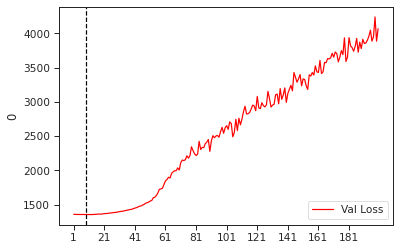

In [52]:
sns.lineplot(list(np.arange(1,201)),clr_vl_df['0'], color='red', label='Val Loss')

plt.xticks(list(np.arange(1, 201,20)))
plt.axvline(x=9, ls='--', color='black')
plt.savefig('figures/cl_rep_val_loss.png',bbox_inches='tight')

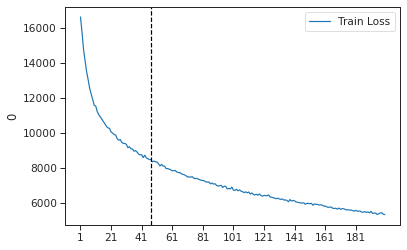

In [53]:
sns.lineplot(list(np.arange(1,201)),ocp_tr_df['0'], label='Train Loss')

plt.xticks(list(np.arange(1, 201,20)))
plt.axvline(x=47, ls='--', color='black')
plt.savefig('figures/ocp_train_loss.png',bbox_inches='tight')

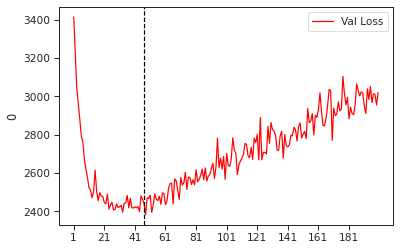

In [54]:
sns.lineplot(list(np.arange(1,201)),ocp_vl_df['0'], color='red', label='Val Loss')

plt.xticks(list(np.arange(1, 201,20)))
plt.axvline(x=47, ls='--', color='black')
plt.savefig('figures/ocp_val_loss.png',bbox_inches='tight')